### Quiz 02: due 23:59, Thursday, December 9, 2021

### -	Please work on this Jupyter notebook directly.
### -	Name a folder using your student id and quiz number (e.g., b88501045-quiz02), put this Jupyter notebook and all output files into this folder and compress this folder to a .zip file (e.g., b88501045-quiz02.zip).
### - Submit the Midterm directly through the NTU COOL course website.


### The attached csv file _Nettebach_5MIN.csv_ includes 49 years of 5-min rainfall records at Nettebach, Germany. Data with such long history is perfect for climate change study. Your task is to perform some statistical tests to confirm the impacts of climate changes onto the rainfall pattern in Nettebach. 


In [135]:
import scipy.stats as stats
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import math
import pymannkendall as mk
import statsmodels.api as sm

In [136]:
#read data
fn = pd.read_csv('Nettebach_5MIN.csv')

fn['datetime'] = pd.to_datetime(fn['datetime'], format = '%Y/%m/%d %H:%M:%S' )
# dt = pd.to_datetime(fn['datetime'], format = '%Y-%m-%d %H:%M:%S')
# fn

,datetime,Rain[mm]
0,1960-01-01 00:00:00,0.0
1,1960-01-01 00:05:00,0.0
2,1960-01-01 00:10:00,0.0
3,1960-01-01 00:15:00,0.0
4,1960-01-01 00:20:00,0.0
...,...,...
5154619,2008-12-31 23:35:00,0.0
5154620,2008-12-31 23:40:00,0.0
5154621,2008-12-31 23:45:00,0.0
5154622,2008-12-31 23:50:00,0.0


#### 1. _Mean Test_ (50% = 10% $\times$ 5 )

#### Please perform statistical tests to check if the mean of the _annual_ rainfall in 1985-2008 is larger than that of the annual rainfall in 1960 – 1984 ($\alpha = 0.01$). 

#### The statistical tests shall be conducted under the following five different scenarios.

In [137]:
from datetime import datetime
# resample data as annual rainfall
annual_rain = fn.resample('Y', on = 'datetime').sum().reset_index())
annual_rain.index


RangeIndex(start=0, stop=49, step=1)

In [138]:
#divid data as datetime and rainfall
dt = annual_rain['datetime']
counts_Nettebach = annual_rain['Rain[mm]']

In [156]:
#split data as: 'Before 1985' and 'After 1985' 
dt_rainfall = datetime.strptime('1985-01-01', '%Y-%M-%d')
annual_rain_p1 = counts_Nettebach[dt < dt_rainfall]
annual_rain_p2 = counts_Nettebach[dt >= dt_rainfall]

#lenth
len_rain_p1 = len(annual_rain_p1)
len_rain_p2 = len(annual_rain_p2)
#mean
mean_rain_p1 = np.mean(annual_rain_p1)
mean_rain_p2 = np.mean(annual_rain_p2)
#stdev
std_rain_p1 = np.std(annual_rain_p1, ddof=1)
std_raind_p2 = np.std(annual_rain_p2, ddof=1)

alpha = 0.01

25     807.77
26     876.48
27     865.64
28     893.68
29     638.72
30     804.99
31     694.82
32     843.36
33     945.25
34     981.30
35     789.44
36     702.48
37     732.26
38    1040.90
39     793.97
40     886.15
41     833.85
42    1048.43
43     799.80
44     960.09
45     798.32
46     878.66
47    1023.62
48     889.24
Name: Rain[mm], dtype: float64


#### Scenario 1 (asymmetric case): $\mu_A$ is known; $\mu_B$ is not known; $\sigma_B=\sigma_A = \sigma$

1. Null Hypothesis $ H_0: \mu_A = \mu_B$
2. Alternative Hypothesis $ H_1: \mu_B> \mu_A$
3. Test statistic $Z = \frac{\bar{X}_{B}-\mu_B}{\sigma/\sqrt{n}}$
4. Distribution of test statistic $Z \sim N(0,1)$
5. Critical Region $\Re$: $Z>z_{1-\alpha}$ (e.g. $\alpha=1$\%)
6. Evaluate $Z$ under $H_0$  & if $z_0>z_{1-\alpha} \Rightarrow$ Reject $H_0$
7. $p-value$: $p(Z>z_0)$

In [157]:
mu_p1 = mean_rain_p1

## This is the hypothesis
mu_p2 = mu_p1
sigma = std_rain_p1

Z = np.abs(mean_rain_p2 - mu_p2)/(sigma/np.sqrt(len_rain_p2))
# Z = (mean_rain_p2 - mu_p2)/(sigma/np.sqrt(len_rain_p2))
z_alpha = stats.norm.ppf(1-alpha)
p_value = 1-stats.norm.cdf(Z)


print(f'test statistic Z = {Z:.4f}')
print(f'z_alpha = {z_alpha:.4f}')

if Z > z_alpha:
    print(f'We have to reject H0, and the p-value is {p_value:.4f}')
else:
    print(f'We have no ground to reject H0, and the p-value is {p_value:.4f}')

test statistic Z = 2.1472
z_alpha = 2.3263
We have no ground to reject H0, and the p-value is 0.0159


#### Scenario 2 (asymmetric case): $\mu_A$ is known; $\mu_B$ is not known; $\sigma_B$ is not known

1. Null Hypothesis $ H_0: \mu_A = \mu_B$
2. Alternative Hypothesis $ H_1: \mu_B> \mu_A$
3. Test statistic $T = \frac{\bar{X}_{B}-\mu_B}{\hat{S_x}_B/\sqrt{n}}$
4. Distribution of test statistic $T \sim t(n-1)$
5. Critical Region $\Re$: $T>t_{n-1,1-\alpha}$ (e.g. $\alpha=1$\%)
6. Evaluate $T$ under $H_0$  & if $t_0>t_{n-1,1-\alpha} \Rightarrow$ Reject $H_0$
7. $p-value$: $p(T>t_0)$


In [158]:
mu_p1 = mean_rain_p1

## This is the hypothesis
mu_p2 = mu_p1
std_p2 = std_raind_p2

T = np.abs(mean_rain_p2 - mu_p2)/(std_p2/np.sqrt(len_rain_p2))

df = len_rain_p2-1
t_alpha = stats.t.ppf(1-alpha,df)
p_value = 1-stats.t.cdf(T,df)

print(f'test statistic T = {T:.4f}')
print(f't_alpha = {t_alpha:.4f}')

if T > t_alpha:
    print(f'We have to reject H0, and the p-value is {p_value:.4f}')
else:
    print(f'We have no ground to reject H0, and the p-value is {p_value:.4f}')
    

test statistic T = 3.1937
t_alpha = 2.4999
We have to reject H0, and the p-value is 0.0020


#### Scenario 3 (symmetric case): $\mu_A$ is not known; $\mu_B$ is not known; $\sigma_B$ is known; $\sigma_A$ is known
1. Null Hypothesis: $ H_0: \mu_A = \mu_B$
2. Alternative Hypothesis: $ H_1: \mu_A \neq \mu_B$
3. Test statistic: $Z = \frac{(\bar{X}_A - \bar{X}_B)-(\mu_A-\mu_B)}{\sigma_{{\bar{X}_A} -{\bar{X}_B}} }$
4. Distribution of test statistic: $Z \sim N(0,1)$
5. Critical Region $\Re$: $|Z|>z_{1-\alpha}$ (e.g. $\alpha=1$\%)
6. Evaluate $Z$ under $H_0$: if $|z_0|>z_{1-\alpha} \Rightarrow$ Reject $H_0$
7. $p-value$ & $p(|Z|>z_0)$

where $\sigma_{{\bar{X}_A} -{\bar{X}_B}} = \sqrt{\frac{\sigma_A^2}{n_A} +\frac {\sigma_B^2}{n_B} }$ 

In [159]:
sigma_p1 = std_rain_p1

sigma_p2 = std_raind_p2

sigma_p1_p2 = np.sqrt((sigma_p1*sigma_p1/len_rain_p1) + (sigma_p2*sigma_p2/len_rain_p2))

Z = np.abs(mean_rain_p1 - mean_rain_p2)/sigma_p1_p2

z_alpha = stats.norm.ppf(1-alpha)
p_value = 1-stats.norm.cdf(Z)


print(f'test statistic Z = {Z:.4f}')
print(f'z_alpha = {z_alpha:.4f}')

if Z > z_alpha:
    print(f'We have to reject H0, and the p-value is {p_value:.4f}')
else:
    print(f'We have no ground to reject H0, and the p-value is {p_value:.4f}')

test statistic Z = 1.8070
z_alpha = 2.3263
We have no ground to reject H0, and the p-value is 0.0354


#### Scenario 4 (symmetric case): $\mu_A$ is not known; $\mu_B$ is not known; $\sigma_B= \sigma_A = \sigma$ is not known
1. Null Hypothesis: $ H_0: \mu_A = \mu_B$
2. Alternative Hypothesis: $ H_1: \mu_A > \mu_B$
3. Test statistic: $t = \frac{ (\bar{X}_A - \bar{X}_B)-(\mu_A-\mu_B)} {\widehat{S}_{X_A,X_B} \sqrt{\frac{1}{n_A} +\frac{1}{n_B} } } $
4. Distribution of test statistic: $T \sim t(n_A +n_B -2)$
5. Critical Region $\Re$: $T>t_{n_A+n_B-2,1-\alpha}$
6. Evaluate $T$ under $H_0$:if $t_0>t_{n_A+n_B-2,1-\alpha} \Rightarrow$ Reject $H_0$
7. $p-value$: $p(T>t_0)$

where $\widehat{S}_{X_A,X_B}^2 =  \frac{(n_A-1) \widehat{S}_{X_A}^2 +(n_B-1) \widehat{S}_{X_B}^2  }{n_A + n_B - 2}$

In [160]:
std_sample_p1_p2 = np.sqrt((((len_rain_p1-1)*std_rain_p1*std_rain_p1) + ((len_rain_p2-1)*std_raind_p2*std_raind_p2))/(len_rain_p1+len_rain_p2-2))

T = np.abs((mean_rain_p1 - mean_rain_p2))/(std_sample_p1_p2*np.sqrt(1/len_rain_p1+1/len_rain_p2))

df = len_rain_p1+len_rain_p2-2

t_alpha = stats.t.ppf(1-alpha,df)
p_value = 1-stats.t.cdf(T,df)


print(f'test statistic T = {T:.4f}')
print(f't_alpha = {t_alpha:.4f}')

if T > t_alpha:
    
    print(f'We have to reject H0, and the p-value is {p_value:.4f}')
else:
    print(f'We have no ground to reject H0, and the p-value is {p_value:.4f}')


test statistic T = 1.7928
t_alpha = 2.4083
We have no ground to reject H0, and the p-value is 0.0397


#### Scenario 5 (symmetric case): $\mu_A$ is not known; $\mu_B$ is not known; $\sigma_B$ is not known; $\sigma_A$ is not known
1. Null Hypothesis: $ H_0: \mu_A = \mu_B$
2. Alternative Hypothesis: $ H_1: \mu_A > \mu_B$
3. Test statistic: $R = \frac{ (\bar{X}_A - \bar{X}_B)-(\mu_A-\mu_B)} { \sqrt{\frac{\hat{S_x}_{A}^2 }{n_A} +\frac{\hat{S_x}_{B}^2}{n_B} } }  $
4. Distribution of test statistic: $R \sim t(\nu)$
5. Critical Region $\Re$: $R>t_{\nu,1-\alpha}$
6. Evaluate $R$ under $H_0$: if $r_0>t_{\nu,1-\alpha} \Rightarrow$ Reject $H_0$
7. $p-value$: $p(R>r_0)$

$\nu \approx  \left( \frac{\hat{S_x}_{A}^2 }{n_A} +\frac{\hat{S_x}_{B}^2}{n_B} \right)^2 / \left[ \frac{1}{n_A-1} \left( \frac{\hat{S_x}_{A}^2 }{n_A} \right)^2 + \frac{1}{n_B-1} \left( \frac{\hat{S_x}_{B}^2 }{n_B} \right)^2 \right]$

In [161]:
S_xp1_n = std_rain_p1*std_rain_p1/len_rain_p1
S_xp2_n = std_raind_p2*std_raind_p2/len_rain_p2

R = np.abs((mean_rain_p1 - mean_rain_p2))/np.sqrt(S_xp1_n + S_xp2_n)

nu = (S_xp1_n+S_xp2_n)**2/(S_xp1_n*S_xp1_n/(len_rain_p1-1) + S_xp2_n*S_xp2_n/(len_rain_p2-1))

t_alpha = stats.t.ppf(1-alpha,nu)
p_value = 1-stats.t.cdf(R,nu)


print(f'test statistic T = {R:.4f}')
print(f't_alpha = {t_alpha:.4f}')

if R > t_alpha:
    
    print(f'We have to reject H0, and the p-value is {p_value:.4f}')
else:
    print(f'We have no ground to reject H0, and the p-value is {p_value:.4f}')

test statistic T = 1.8070
t_alpha = 2.4181
We have no ground to reject H0, and the p-value is 0.0390


#### 2. _Trend Test_ (50%) - annual rainfall

#### Please perform statistical tests to check if a trend in _annual_ rainfall over the entire 1960-2008 period can be found.

In [171]:

# print(np.array(range(1960, n_years+1960)))

[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008]


##### 2.1. (5+5%) Perform linear regression over annual rainfall data, and make a plot for visual inspection. The 1-year rainfall data and the fitted line shall be plotted in a single plot. 

In [175]:
n_years = len(annual_rain.index) #49
years = np.array(range(1960, n_years+1960)) #create an year array from 1960 to 2008 

#linearegression fitting
b_st, a_st, r_st, p_st, se_st  = stats.linregress(years, counts_Nettebach) 

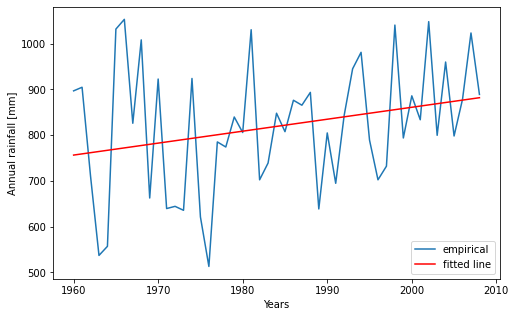

slope=2.6137, intercept=-4366.3352, r2=0.0700, p_value=0.0662, slope=1.389894


In [186]:
plt.rcParams['figure.figsize'] = (8,5)
plt.plot(years, counts_Nettebach, label='empirical')

y = years* b_st + a_st
plt.plot(years, y, color='red', label='fitted line')

plt.xlabel('Years')
plt.ylabel('Annual rainfall [mm]')
plt.legend()
plt.show()

print(f'slope={b_st:.4f}, intercept={a_st:.4f}, r2={r_st**2:.4f}, p_value={p_st:.4f}, slope={se_st:4f}')

##### 2.2. (20%) Perform F-test to check if there is a trend in both one- and two-sided tests ($\alpha = 0.01$). You are required to output  $ss_{tol}$, $ss_{reg}$, $ss_{res}$ and $F$ statistics. Then, after comparing test statistics $F$ and critical region, one can know if one can reject null hypothesis $H_{0}$one can reject null hypothesis $H_{0}$

In [179]:
y_est = a_st + b_st*years

y_mean = np.mean(counts_Nettebach)
x_mean = np.mean(years)

cov_xy_m = np.cov(years, counts_Nettebach, ddof=1)
cov_xy = cov_xy_m[0][1]
var_x = cov_xy_m[0][0]
var_y = cov_xy_m[1][1]

var_err_est = (n_years*var_y - n_years*cov_xy*cov_xy/var_x)/(n_years-2)

In [180]:
ss_reg = np.sum((y_est - (a_st + b_st*x_mean))**2)
ss_res = np.sum((counts_Nettebach - y_est)**2)

ss_total = np.sum((counts_Nettebach - y_mean)**2)

print(f'Regrssion sum of squares, SSreg: {ss_reg:.3f}')
print(f'Residual sum of squares, SSres: {ss_res:.3f}')
print(f'Total sum of squares, ssTot: {ss_total:3f}')

F = ss_reg / ss_res * (n_years-2)
print(f'Test statistics F = {F:.3f}')

Regrssion sum of squares, SSreg: 66949.455
Residual sum of squares, SSres: 889790.118
Total sum of squares, ssTot: 956739.572653
Test statistics F = 3.536


In [207]:

alpha = 0.01
alpha_upper = 1 - alpha/2
alpha_lower = alpha/2
dof = n_years-2

#two-sided test
f_upper = stats.f.ppf(alpha_upper, dfn=dof, dfd=dof)
f_lower = stats.f.ppf(alpha_lower, dfn=dof, dfd=dof)
p_value = 1 - stats.f.cdf(F, dfn=dof, dfd=dof)

print(f'Fow two sided test, the critical region is [{f_lower:.3f},{f_upper:.3f}]')

if f_lower < F < f_upper:
    print(f'We have no ground to reject H0')
else:
    print(f'We have to reject H0, and the p-value is {p_value:.6f}')

#one-sided test
f_upper = stats.f.ppf(1-alpha, dfn=dof, dfd=dof)
print(f'For one sided test, the upper bound of the critical region is {f_upper:.3f}')

if F < f_upper:
    print(f'We have no ground to reject H0')
else:
    print(f'We have to reject H0, and the p-value is {p_value:.6f}')

Fow two sided test, the critical region is [0.466,2.148]
We have to reject H0, and the p-value is 0.000015
For one sided test, the upper bound of the critical region is 1.991
We have to reject H0, and the p-value is 0.000015


#### As we know, F-test may not be the most suitable method to perfrom trend test for time series since 'time' is not normally distributed.  Alternatively, we may try to do _non-parametric Mann-Kendall test_. 

##### 2.3. (10%) Please check if there is seasonality and autocorrelation in the annual rainfall time series using ACF plot.

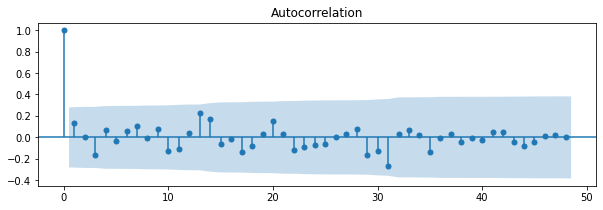

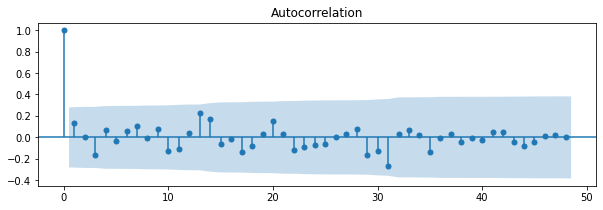

In [190]:
fig, ax = plt.subplots(figsize=(10,3))
sm.graphics.tsa.plot_acf(counts_Nettebach, lags=48, ax=ax)
# from the garphic, we can ignore the autocorrelation. 
# So we can simply use the origincal Mann Kendall test, which doesn't consider auto-correlation or seasonality.

##### 2.4. (10%) Based upon the above checks, apply a suitable version of the _non-parametric Mann-Kendall test_ to performing time series trend test ($\alpha = 0.01$) and print the result.

In [152]:
#oringal mann kendall test
result_ap_m_smk = mk.original_test(counts_Nettebach)
print(result_ap_m_smk)

Mann_Kendall_Test(trend='no trend', h=False, p=0.08470221727388183, z=1.7240311646735567, Tau=0.17091836734693877, s=201.0, var_s=13457.666666666666, slope=3.02297727272727, intercept=753.5985454545455)


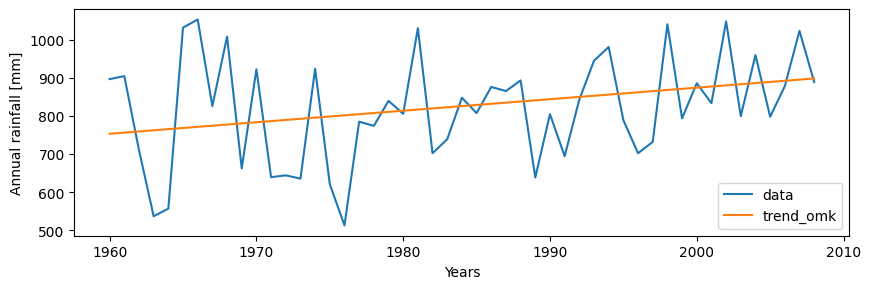

In [210]:
plt. figure(figsize=(10,3), dpi=100)

trend_ap_m_mk = np.arange(len(counts_Nettebach)) * result_ap_m_smk.slope + result_ap_m_smk.intercept

plt.plot(years, counts_Nettebach, label = 'data')
plt.plot(years, trend_ap_m_mk, label = 'trend_omk')

plt.xlabel('Years')
plt.ylabel('Annual rainfall [mm]')
plt.legend()
plt.show()
